<center>Washington State University</center>
<center>School of Electrical Engineering and Computer Science</center>
<center>CptS 315 – Introduction to Data Mining</center>           <center>Online</center>
<center>Ananth Jillepalli</center>
<center>Empirical Analysis 1</center><br>

<center>Name: Nam Jun Lee</center>
<center>Student Number: 11606459</center>
<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

**Import Packages**

In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

**Global variables**

In [2]:
# number of trees using plot
numTreeUsingPlot = [10, 20, 40, 60, 80, 100]
# diffeent values of C parameter using plot
cParaUsingPlot = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

**Bagged Decision Tree Function**

In [3]:
# function of the different depth and different sizes of bagged trees
def baggedDecision(depth, x, y, xTest, yTest):
    # number of trees
    numTree = [10, 20, 40, 60, 80, 100]
    # test accuracy list
    Testaccuracy = []
    # train accuracy list
    Trainaccuracy = []
    # Learn the bagged decision tree model in order of size
    for n_estimators in numTree:
        # fit bagged decision tree
        clf = BaggingClassifier(DecisionTreeClassifier(max_depth=depth),
                           n_estimators=n_estimators, random_state=1)
        clf.fit(x,y)
        # find train accuracy
        Trainacc = clf.score(x, y)
        # find test accuracy
        Testacc = clf.score(xTest, yTest)
        # putting each accuracy in each list
        Trainaccuracy.append(Trainacc)
        Testaccuracy.append(Testacc)
    # create a data frame to determine the accuracy of each tree by size
    decTree = {'Depth' : depth,
    'Num of Tree' : numTree,
      'Train': Trainaccuracy,
     'Test' : Testaccuracy}
    decTreeTb = pd.DataFrame(decTree)
    # return accuracy table, train accuracy list, test accuracy list
    return decTreeTb, Trainaccuracy, Testaccuracy
    

**SVM Classification Function (Linear)**

In [4]:
# function of the different C parameter of linear kernel SVM model
def SVMLinear(degree, x, y, xTest, yTest):
    # C parameter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
    cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    # test accuracy list
    TestaccuracyLinear = []
    # train accuracy list
    TrainaccuracyLinear = []
    # Learn the linear SVM classifcation model in order of C parameter
    for n_estimators in cPara:
        # fit linear SVM model
        svm_md = SVC(kernel='linear', C= n_estimators, random_state=1)
        svm_md.fit(x,y)
        # find train and test accuracy
        Trainacc = svm_md.score(x, y)
        Testacc = svm_md.score(xTest, yTest)
        # putting each accuracy in each list
        TrainaccuracyLinear.append(Trainacc)
        TestaccuracyLinear.append(Testacc)
    # crate a data frame to determine the accuracy of each c parameter
    svmMdListVL = {
               'Kernel' : 'Linear',
    'Degree' : 0,
    'C Parameter' : cPara,
      'Train': TrainaccuracyLinear,
     'Test' : TestaccuracyLinear}
    svmTb = pd.DataFrame(svmMdListVL)
    # return accuracy table, train accuracy list, test accuracy list
    return svmTb, TrainaccuracyLinear, TestaccuracyLinear

**SVM Classification Function (Polynomial)**

In [5]:
# function of the different C parameter and different degree of polynomial kernel SVM model 
def SVMPoly(degree, x, y, xTest, yTest):
    # C parameter = 0.0001, 0.001, 0.01, 0.1, 0, 10, 100, 1000, 10000
    cPara = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
    # test accuracy list
    TestaccuracyPoly = []
    # train accuracy list
    TrainaccuracyPoly = []
    # Learn the polynomial SVM classifcation model in order of C parameter
    for n_estimators in cPara:
        # fit polynomial SVM model
        svm_mdPoly = SVC(kernel='poly', C= n_estimators, random_state=1, degree=degree)
        svm_mdPoly.fit(x,y)
        # find train and test accuracy
        Trainacc = svm_mdPoly.score(x, y)
        Testacc = svm_mdPoly.score(xTest, yTest)
        # putting each accuracy in each list
        TrainaccuracyPoly.append(Trainacc)
        TestaccuracyPoly.append(Testacc)
    # crate a data frame to determine the accuracy of each c parameter
    svmMdListVP = {
               'Kernel' : 'Polynomial',
    'Degree' : degree,
    'C Parameter' : cPara,
      'Train': TrainaccuracyPoly,
     'Test' : TestaccuracyPoly}
    svmTbPoly = pd.DataFrame(svmMdListVP)
    # return accuracy table, train accuracy list, test accuracy list
    return svmTbPoly, TrainaccuracyPoly, TestaccuracyPoly

**1. VOTING**

In [6]:
# import voting dataset
data1 = arff.loadarff('vote.arff')
# voting data into data frame
df1 = pd.DataFrame(data1[0])
# remove b from a byte string
df1 = df1.apply(lambda x: x.str.decode('utf8'))

In [7]:
# Remove any question marks that exist in vote arff data
df1['handicapped-infants'] = df1['handicapped-infants'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['water-project-cost-sharing'] = df1['water-project-cost-sharing'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['adoption-of-the-budget-resolution'] = df1['adoption-of-the-budget-resolution'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['physician-fee-freeze'] = df1['physician-fee-freeze'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['el-salvador-aid'] = df1['el-salvador-aid'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['religious-groups-in-schools'] = df1['religious-groups-in-schools'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['anti-satellite-test-ban'] = df1['anti-satellite-test-ban'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['aid-to-nicaraguan-contras'] = df1['aid-to-nicaraguan-contras'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['mx-missile'] = df1['mx-missile'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['immigration'] = df1['immigration'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['synfuels-corporation-cutback'] = df1['synfuels-corporation-cutback'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['education-spending'] = df1['education-spending'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['superfund-right-to-sue'] = df1['superfund-right-to-sue'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['crime'] = df1['crime'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['duty-free-exports'] = df1['duty-free-exports'].apply(lambda x: None if x == '?' else x).fillna(method='ffill')
df1['export-administration-act-south-africa'] = df1['export-administration-act-south-africa'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')
df1['Class'] = df1['Class'].apply(lambda x: None if x == '?' else x).fillna(method='bfill')

In [8]:
# Convert data types of all variables to integers (1 or 0)
df1['handicapped-infants'] = df1['handicapped-infants'].replace({'y' : 1, 'n' : 0})
df1['water-project-cost-sharing'] = df1['water-project-cost-sharing'].replace({'y' : 1, 'n' : 0})
df1['adoption-of-the-budget-resolution'] = df1['adoption-of-the-budget-resolution'].replace({'y' : 1, 'n' : 0})
df1['physician-fee-freeze'] = df1['physician-fee-freeze'].replace({'y' : 1, 'n' : 0})
df1['el-salvador-aid'] = df1['el-salvador-aid'].replace({'y' : 1, 'n' : 0})
df1['religious-groups-in-schools'] = df1['religious-groups-in-schools'].replace({'y' : 1, 'n' : 0})
df1['anti-satellite-test-ban'] = df1['anti-satellite-test-ban'].replace({'y' : 1, 'n' : 0})
df1['aid-to-nicaraguan-contras'] = df1['aid-to-nicaraguan-contras'].replace({'y' : 1, 'n' : 0})
df1['mx-missile'] = df1['mx-missile'].replace({'y' : 1, 'n' : 0})
df1['immigration'] = df1['immigration'].replace({'y' : 1, 'n' : 0})
df1['synfuels-corporation-cutback'] = df1['synfuels-corporation-cutback'].replace({'y' : 1, 'n' : 0})
df1['education-spending'] = df1['education-spending'].replace({'y' : 1, 'n' : 0})
df1['superfund-right-to-sue'] = df1['superfund-right-to-sue'].replace({'y' : 1, 'n' : 0})
df1['crime'] = df1['crime'].replace({'y' : 1, 'n' : 0})
df1['duty-free-exports'] = df1['duty-free-exports'].replace({'y' : 1, 'n' : 0})
df1['export-administration-act-south-africa'] = df1['export-administration-act-south-africa'].replace({'y' : 1, 'n' : 0})

**Split test and train data**

In [9]:
# check the number of columns and row for find the last 100 examples
print("total num of columns and rows:", df1.shape)
# Other variables except Class variables
x = df1.iloc[:, range(0,16)]
# Class variables
y = df1['Class']
# last 100 examples for testing
x_test = x[335:]
y_test = y[335:]
# remaining examples for training
x_train = x[:335]
y_train = y[:335]

total num of columns and rows: (435, 17)


**Bagged Decision Tree (Voting)**

Try trees of different depth (1, 2, 3, 5, 10) and different
sizes of bag or ensemble, i.e., number of trees (10, 20, 40, 60, 80, 100). Compute the training accuracy and testing accuracy for different combinations of tree depth and number of trees; and plot them. List your observations.

**Depth 1 and different sizes of bagged trees**

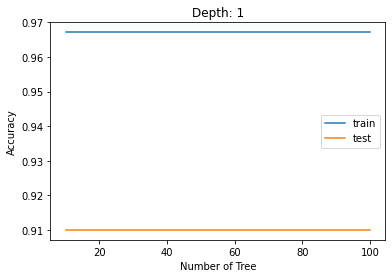

   Depth  Num of Tree     Train  Test
0      1           10  0.967164  0.91
1      1           20  0.967164  0.91
2      1           40  0.967164  0.91
3      1           60  0.967164  0.91
4      1           80  0.967164  0.91
5      1          100  0.967164  0.91


In [10]:
# depth 1
dp1Table, dp1Train, dp1Test = baggedDecision(1, x_train, y_train, x_test, y_test)
# plot depth 1 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp1Train)
plt.plot(numTreeUsingPlot, dp1Test)
plt.title("Depth: 1")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 1 and different sizes of bag train and test accuracy list
print(dp1Table)

**Depth 2 and different sizes of bagged trees**

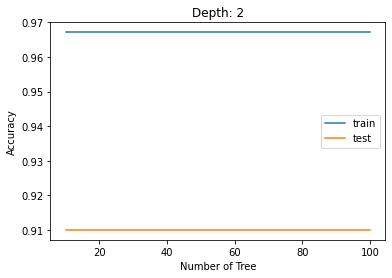

   Depth  Num of Tree     Train  Test
0      2           10  0.967164  0.91
1      2           20  0.967164  0.91
2      2           40  0.967164  0.91
3      2           60  0.967164  0.91
4      2           80  0.967164  0.91
5      2          100  0.967164  0.91


In [11]:
# depth 2
dp2Table, dp2Train, dp2Test = baggedDecision(2, x_train, y_train, x_test, y_test)
# plot depth 2 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp2Train)
plt.plot(numTreeUsingPlot, dp2Test)
plt.title("Depth: 2")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 2 and different sizes of bag train and test accuracy list
print(dp2Table)

**Depth 3 and different sizes of bagged trees**

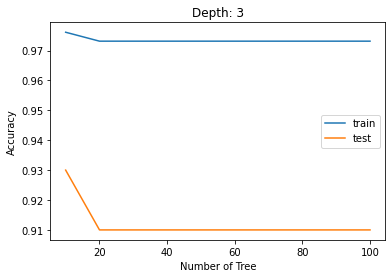

   Depth  Num of Tree     Train  Test
0      3           10  0.976119  0.93
1      3           20  0.973134  0.91
2      3           40  0.973134  0.91
3      3           60  0.973134  0.91
4      3           80  0.973134  0.91
5      3          100  0.973134  0.91


In [12]:
# depth 3
dp3Table, dp3Train, dp3Test = baggedDecision(3, x_train, y_train, x_test, y_test)
# plot depth 3 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp3Train)
plt.plot(numTreeUsingPlot, dp3Test)
plt.title("Depth: 3")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 3 and different sizes of bag train and test accuracy list
print(dp3Table)

**Depth 5 and different sizes of bagged trees**

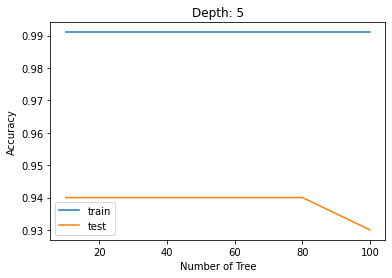

   Depth  Num of Tree     Train  Test
0      5           10  0.991045  0.94
1      5           20  0.991045  0.94
2      5           40  0.991045  0.94
3      5           60  0.991045  0.94
4      5           80  0.991045  0.94
5      5          100  0.991045  0.93


In [13]:
# depth 5
dp5Table, dp5Train, dp5Test = baggedDecision(5, x_train, y_train, x_test, y_test)
# plot depth 5 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp5Train)
plt.plot(numTreeUsingPlot, dp5Test)
plt.title("Depth: 5")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 5 and different sizes of bag train and test accuracy list
print(dp5Table)

**Depth 10 and different sizes of bagged trees**

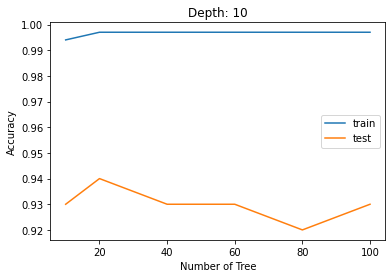

   Depth  Num of Tree     Train  Test
0     10           10  0.994030  0.93
1     10           20  0.997015  0.94
2     10           40  0.997015  0.93
3     10           60  0.997015  0.93
4     10           80  0.997015  0.92
5     10          100  0.997015  0.93


In [14]:
# depth 10
dp10Table, dp10Train, dp10Test = baggedDecision(10, x_train, y_train, x_test, y_test)
# plot depth 5 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp10Train)
plt.plot(numTreeUsingPlot, dp10Test)
plt.title("Depth: 10")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 10 and different sizes of bag train and test accuracy list
print(dp10Table)

**SVM Classification (Voting)**

(a) Using a linear kernel (-t 0 option), train the SVM on the training data for different values of C parameter. Compute the training accuracy, and testing accuracy for the SVM obtained with different values of the C parameter. Plot the training accuracy and testing accuracy as a function of C (C value on x-axis and Accuracy on y-axis) – one curve each for training, validation, and testing data.

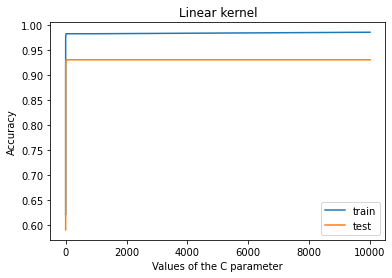

   Kernel  Degree  C Parameter     Train  Test
0  Linear       0       0.0001  0.620896  0.59
1  Linear       0       0.0010  0.620896  0.59
2  Linear       0       0.0100  0.943284  0.89
3  Linear       0       0.1000  0.967164  0.91
4  Linear       0       1.0000  0.976119  0.92
5  Linear       0      10.0000  0.982090  0.93
6  Linear       0     100.0000  0.982090  0.93
7  Linear       0    1000.0000  0.982090  0.93
8  Linear       0   10000.0000  0.985075  0.93


In [15]:
# linear kernel SVM on the training data for different C parameters
# degree default
linearTable, linearTrain, linearTest = SVMLinear(0, x_train, y_train, x_test, y_test)
# plot linear kernel SVM for different C parameters 
plt.plot(cParaUsingPlot, linearTrain)
plt.plot(cParaUsingPlot, linearTest)
plt.title("Linear kernel")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show different values of C parameter of linear kernel SVM
print(linearTable)

(b) Repeat the experiment (a) with polynomial kernel (-t 1 -d option) of degree 2, 3, and 4. Compare the training and testing accuracies for different kernels (linear, polynomial kernel of degree 2, polynomial kernel of degree 3, and polynomial kernel of degree 4). List your observations.

**Polynomial kernel of degree 2**

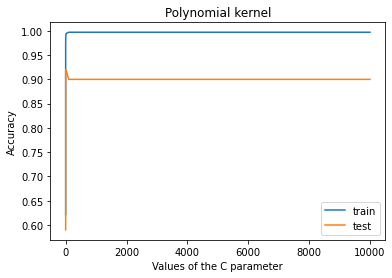

       Kernel  Degree  C Parameter     Train  Test
0  Polynomial       2       0.0001  0.620896  0.59
1  Polynomial       2       0.0010  0.620896  0.59
2  Polynomial       2       0.0100  0.928358  0.87
3  Polynomial       2       0.1000  0.970149  0.91
4  Polynomial       2       1.0000  0.982090  0.92
5  Polynomial       2      10.0000  0.994030  0.92
6  Polynomial       2     100.0000  0.997015  0.90
7  Polynomial       2    1000.0000  0.997015  0.90
8  Polynomial       2   10000.0000  0.997015  0.90


In [16]:
# polynomial kernel SVM on the training data for different C parameters
# degree 2
polyTable2, polyTrain2, polyTest2 = SVMPoly(2, x_train, y_train, x_test, y_test)
# plot polynomial kernel SVM for different C parameters 
plt.plot(cParaUsingPlot, polyTrain2)
plt.plot(cParaUsingPlot, polyTest2)
plt.title("Polynomial kernel")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show different values of C parameter of polynomial kernel SVM
print(polyTable2)

**Polynomial kernel of degree 3**

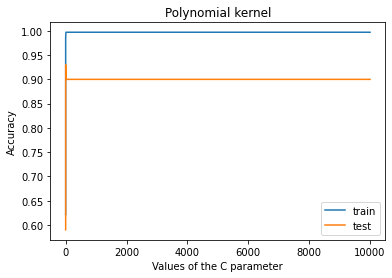

       Kernel  Degree  C Parameter     Train  Test
0  Polynomial       3       0.0001  0.620896  0.59
1  Polynomial       3       0.0010  0.620896  0.59
2  Polynomial       3       0.0100  0.949254  0.89
3  Polynomial       3       0.1000  0.982090  0.92
4  Polynomial       3       1.0000  0.988060  0.93
5  Polynomial       3      10.0000  0.997015  0.90
6  Polynomial       3     100.0000  0.997015  0.90
7  Polynomial       3    1000.0000  0.997015  0.90
8  Polynomial       3   10000.0000  0.997015  0.90


In [17]:
# polynomial kernel SVM on the training data for different C parameters
# degree 3
polyTable3, polyTrain3, polyTest3 = SVMPoly(3, x_train, y_train, x_test, y_test)
# plot polynomial kernel SVM for different C parameters 
plt.plot(cParaUsingPlot, polyTrain3)
plt.plot(cParaUsingPlot, polyTest3)
plt.title("Polynomial kernel")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show different values of C parameter of polynomial kernel SVM
print(polyTable3)

**Polynomial kernel of degree 4**

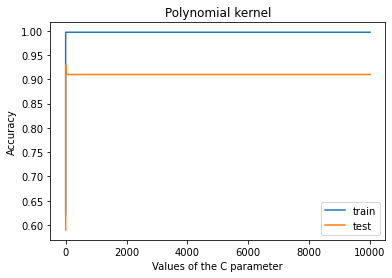

       Kernel  Degree  C Parameter     Train  Test
0  Polynomial       4       0.0001  0.620896  0.59
1  Polynomial       4       0.0010  0.862687  0.85
2  Polynomial       4       0.0100  0.967164  0.89
3  Polynomial       4       0.1000  0.985075  0.93
4  Polynomial       4       1.0000  0.997015  0.93
5  Polynomial       4      10.0000  0.997015  0.91
6  Polynomial       4     100.0000  0.997015  0.91
7  Polynomial       4    1000.0000  0.997015  0.91
8  Polynomial       4   10000.0000  0.997015  0.91


In [18]:
# polynomial kernel SVM on the training data for different C parameters
# degree 4
polyTable4, polyTrain4, polyTest4 = SVMPoly(4, x_train, y_train, x_test, y_test)
# plot polynomial kernel SVM for different C parameters 
plt.plot(cParaUsingPlot, polyTrain4)
plt.plot(cParaUsingPlot, polyTest4)
plt.title("Polynomial kernel")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show different values of C parameter of polynomial kernel SVM
print(polyTable4)

**Compare the training and testing accuracies for different kernels**

In [19]:
# Linear Kernel
print("Linear Kernel\n\n", linearTable)

Linear Kernel

    Kernel  Degree  C Parameter     Train  Test
0  Linear       0       0.0001  0.620896  0.59
1  Linear       0       0.0010  0.620896  0.59
2  Linear       0       0.0100  0.943284  0.89
3  Linear       0       0.1000  0.967164  0.91
4  Linear       0       1.0000  0.976119  0.92
5  Linear       0      10.0000  0.982090  0.93
6  Linear       0     100.0000  0.982090  0.93
7  Linear       0    1000.0000  0.982090  0.93
8  Linear       0   10000.0000  0.985075  0.93


In [20]:
# Polynomial Kernel of degree 2
print("Polynomial Kernel of degree 2\n\n", polyTable2)

Polynomial Kernel of degree 2

        Kernel  Degree  C Parameter     Train  Test
0  Polynomial       2       0.0001  0.620896  0.59
1  Polynomial       2       0.0010  0.620896  0.59
2  Polynomial       2       0.0100  0.928358  0.87
3  Polynomial       2       0.1000  0.970149  0.91
4  Polynomial       2       1.0000  0.982090  0.92
5  Polynomial       2      10.0000  0.994030  0.92
6  Polynomial       2     100.0000  0.997015  0.90
7  Polynomial       2    1000.0000  0.997015  0.90
8  Polynomial       2   10000.0000  0.997015  0.90


In [21]:
# Polynomial Kernel of degree 3
print("Polynomial Kernel of degree 3\n\n", polyTable3)

Polynomial Kernel of degree 3

        Kernel  Degree  C Parameter     Train  Test
0  Polynomial       3       0.0001  0.620896  0.59
1  Polynomial       3       0.0010  0.620896  0.59
2  Polynomial       3       0.0100  0.949254  0.89
3  Polynomial       3       0.1000  0.982090  0.92
4  Polynomial       3       1.0000  0.988060  0.93
5  Polynomial       3      10.0000  0.997015  0.90
6  Polynomial       3     100.0000  0.997015  0.90
7  Polynomial       3    1000.0000  0.997015  0.90
8  Polynomial       3   10000.0000  0.997015  0.90


In [22]:
# Polynomial Kernel of degree 4
print("Polynomial Kernel of degree 4\n\n", polyTable4)

Polynomial Kernel of degree 4

        Kernel  Degree  C Parameter     Train  Test
0  Polynomial       4       0.0001  0.620896  0.59
1  Polynomial       4       0.0010  0.862687  0.85
2  Polynomial       4       0.0100  0.967164  0.89
3  Polynomial       4       0.1000  0.985075  0.93
4  Polynomial       4       1.0000  0.997015  0.93
5  Polynomial       4      10.0000  0.997015  0.91
6  Polynomial       4     100.0000  0.997015  0.91
7  Polynomial       4    1000.0000  0.997015  0.91
8  Polynomial       4   10000.0000  0.997015  0.91


**2. IONOSPHERE**

In [23]:
# import ionosphere dataset
data2 = arff.loadarff('ionosphere.arff')
# ionosphere data into data frame
df2 = pd.DataFrame(data2[0])
# remove b from a byte string of Class variables
df2['class'] = df2['class'].str.decode('utf-8')

**Split test and train data**

In [24]:
# Other variables except class variables
x2 = df2.iloc[:, range(0,34)]
# Class variables
y2 = df2['class']
# last 25 percent examples for testing
# remaining examples for training
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,
                                                        train_size=0.75,
                                                       shuffle=False,
                                                       random_state=1)


**Bagged Decision Tree (Ionosphere)**

Try trees of different depth (1, 2, 3, 5, 10) and different
sizes of bag or ensemble, i.e., number of trees (10, 20, 40, 60, 80, 100). Compute the training accuracy and testing accuracy for different combinations of tree depth and number of trees; and plot them. List your observations.

**Depth 1 and different sizes of bagged trees**

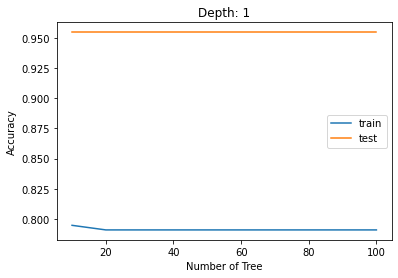

   Depth  Num of Tree     Train      Test
0      1           10  0.794677  0.954545
1      1           20  0.790875  0.954545
2      1           40  0.790875  0.954545
3      1           60  0.790875  0.954545
4      1           80  0.790875  0.954545
5      1          100  0.790875  0.954545


In [25]:
# depth 1
dp1IPHTable, dp1IPHTrain, dp1IPHTest = baggedDecision(1, x_train2, y_train2, x_test2, y_test2)
# plot depth 1 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp1IPHTrain)
plt.plot(numTreeUsingPlot, dp1IPHTest)
plt.title("Depth: 1")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 1 and different sizes of bag train and test accuracy list
print(dp1IPHTable)

**Depth 2 and different sizes of bagged trees**


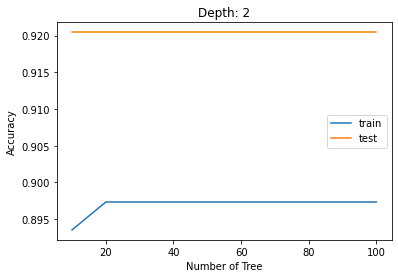

   Depth  Num of Tree     Train      Test
0      2           10  0.893536  0.920455
1      2           20  0.897338  0.920455
2      2           40  0.897338  0.920455
3      2           60  0.897338  0.920455
4      2           80  0.897338  0.920455
5      2          100  0.897338  0.920455


In [26]:
# depth 2
dp2IPHTable, dp2IPHTrain, dp2IPHTest = baggedDecision(2, x_train2, y_train2, x_test2, y_test2)
# plot depth 2 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp2IPHTrain)
plt.plot(numTreeUsingPlot, dp2IPHTest)
plt.title("Depth: 2")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 2 and different sizes of bag train and test accuracy list
print(dp2IPHTable)

**Depth 3 and different sizes of bagged trees**


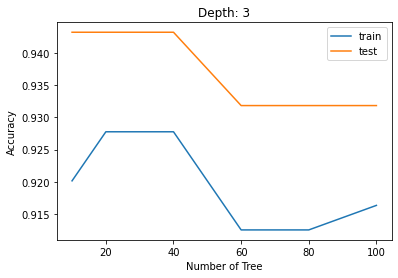

   Depth  Num of Tree     Train      Test
0      3           10  0.920152  0.943182
1      3           20  0.927757  0.943182
2      3           40  0.927757  0.943182
3      3           60  0.912548  0.931818
4      3           80  0.912548  0.931818
5      3          100  0.916350  0.931818


In [27]:
# depth 3
dp3IPHTable, dp3IPHTrain, dp3IPHTest = baggedDecision(3, x_train2, y_train2, x_test2, y_test2)
# plot depth 3 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp3IPHTrain)
plt.plot(numTreeUsingPlot, dp3IPHTest)
plt.title("Depth: 3")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 3 and different sizes of bag train and test accuracy list
print(dp3IPHTable)

**Depth 5 and different sizes of bagged trees**


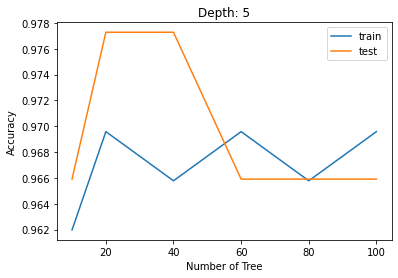

   Depth  Num of Tree     Train      Test
0      5           10  0.961977  0.965909
1      5           20  0.969582  0.977273
2      5           40  0.965779  0.977273
3      5           60  0.969582  0.965909
4      5           80  0.965779  0.965909
5      5          100  0.969582  0.965909


In [28]:
# depth 5
dp5IPHTable, dp5IPHTrain, dp5IPHTest = baggedDecision(5, x_train2, y_train2, x_test2, y_test2)
# plot depth 5 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp5IPHTrain)
plt.plot(numTreeUsingPlot, dp5IPHTest)
plt.title("Depth: 5")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 5 and different sizes of bag train and test accuracy list
print(dp5IPHTable)

**Depth 10 and different sizes of bagged trees**

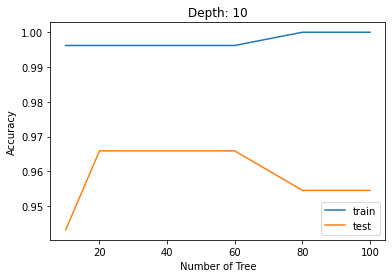

   Depth  Num of Tree     Train      Test
0     10           10  0.996198  0.943182
1     10           20  0.996198  0.965909
2     10           40  0.996198  0.965909
3     10           60  0.996198  0.965909
4     10           80  1.000000  0.954545
5     10          100  1.000000  0.954545


In [29]:
# depth 10
dp10IPHTable, dp10IPHTrain, dp10IPHTest = baggedDecision(10, x_train2, y_train2, x_test2, y_test2)
# plot depth 10 and different sizes of bag train and test accuracy
plt.plot(numTreeUsingPlot, dp10IPHTrain)
plt.plot(numTreeUsingPlot, dp10IPHTest)
plt.title("Depth: 10")
plt.xlabel("Number of Tree")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show depth 10 and different sizes of bag train and test accuracy list
print(dp10IPHTable)

**SVM Classification (Ionosphere)**

(a) Using a linear kernel (-t 0 option), train the SVM on the training data for different values of C parameter. Com- pute the training accuracy, and testing accuracy for the SVM obtained with different values of the C parameter. Plot the training accuracy and testing accuracy as a function of C (C value on x-axis and Accuracy on y-axis) – one curve each for training, validation, and testing data.

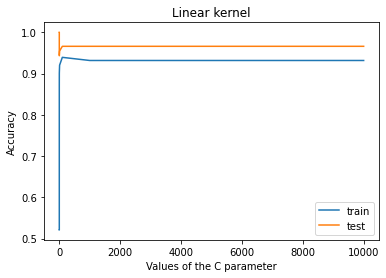

   Kernel  Degree  C Parameter     Train      Test
0  Linear       0       0.0001  0.520913  1.000000
1  Linear       0       0.0010  0.520913  1.000000
2  Linear       0       0.0100  0.840304  0.965909
3  Linear       0       0.1000  0.874525  0.943182
4  Linear       0       1.0000  0.901141  0.943182
5  Linear       0      10.0000  0.920152  0.954545
6  Linear       0     100.0000  0.939163  0.965909
7  Linear       0    1000.0000  0.931559  0.965909
8  Linear       0   10000.0000  0.931559  0.965909


In [30]:
# linear kernel SVM on the training data for different C parameters
# degree default
linearTableIPH, linearTrainIPH, linearTestIPH = SVMLinear(0, x_train2, y_train2, x_test2, y_test2)
# plot linear kernel SVM for different C parameters 
plt.plot(cParaUsingPlot, linearTrainIPH)
plt.plot(cParaUsingPlot, linearTestIPH)
plt.title("Linear kernel")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show different values of C parameter of linear kernel SVM
print(linearTableIPH)

(b) Repeat the experiment (a) with polynomial kernel (-t 1 -d option) of degree 2, 3, and 4. Compare the training and testing accuracies for different kernels (linear, polynomial kernel of degree 2, polynomial kernel of degree 3, and polynomial kernel of degree 4). List your observations.

**Polynomial kernel of degree 2**

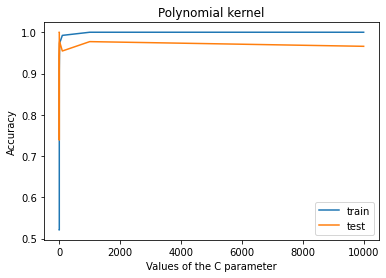

       Kernel  Degree  C Parameter     Train      Test
0  Polynomial       2       0.0001  0.520913  1.000000
1  Polynomial       2       0.0010  0.520913  1.000000
2  Polynomial       2       0.0100  0.520913  1.000000
3  Polynomial       2       0.1000  0.828897  0.738636
4  Polynomial       2       1.0000  0.908745  0.943182
5  Polynomial       2      10.0000  0.973384  0.977273
6  Polynomial       2     100.0000  0.992395  0.954545
7  Polynomial       2    1000.0000  1.000000  0.977273
8  Polynomial       2   10000.0000  1.000000  0.965909


In [31]:
# polynomial kernel SVM on the training data for different C parameters
# degree 2
polyTable2IPH, polyTrain2IPH, polyTest2IPH = SVMPoly(2, x_train2, y_train2, x_test2, y_test2)
# plot polynomial kernel SVM for different C parameters 
plt.plot(cParaUsingPlot, polyTrain2IPH)
plt.plot(cParaUsingPlot, polyTest2IPH)
plt.title("Polynomial kernel")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show different values of C parameter of polynomial kernel SVM
print(polyTable2IPH)

**Polynomial kernel of degree 3**

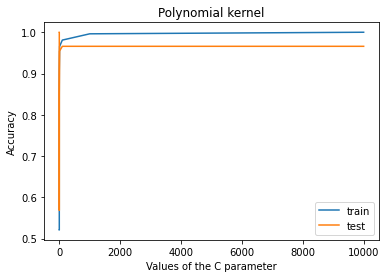

       Kernel  Degree  C Parameter     Train      Test
0  Polynomial       3       0.0001  0.520913  1.000000
1  Polynomial       3       0.0010  0.520913  1.000000
2  Polynomial       3       0.0100  0.520913  1.000000
3  Polynomial       3       0.1000  0.840304  0.568182
4  Polynomial       3       1.0000  0.908745  0.852273
5  Polynomial       3      10.0000  0.965779  0.954545
6  Polynomial       3     100.0000  0.980989  0.965909
7  Polynomial       3    1000.0000  0.996198  0.965909
8  Polynomial       3   10000.0000  1.000000  0.965909


In [32]:
# polynomial kernel SVM on the training data for different C parameters
# degree 3
polyTable3IPH, polyTrain3IPH, polyTest3IPH = SVMPoly(3, x_train2, y_train2, x_test2, y_test2)
# plot polynomial kernel SVM for different C parameters 
plt.plot(cParaUsingPlot, polyTrain3IPH)
plt.plot(cParaUsingPlot, polyTest3IPH)
plt.title("Polynomial kernel")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show different values of C parameter of polynomial kernel SVM
print(polyTable3IPH)

**Polynomial kernel of degree 4**

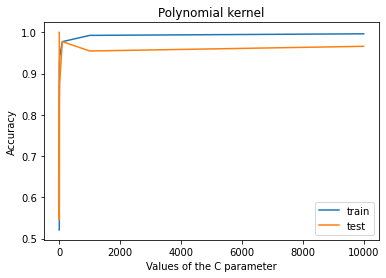

       Kernel  Degree  C Parameter     Train      Test
0  Polynomial       4       0.0001  0.520913  1.000000
1  Polynomial       4       0.0010  0.520913  1.000000
2  Polynomial       4       0.0100  0.574144  1.000000
3  Polynomial       4       0.1000  0.821293  0.545455
4  Polynomial       4       1.0000  0.912548  0.818182
5  Polynomial       4      10.0000  0.939163  0.875000
6  Polynomial       4     100.0000  0.977186  0.977273
7  Polynomial       4    1000.0000  0.992395  0.954545
8  Polynomial       4   10000.0000  0.996198  0.965909


In [33]:
# polynomial kernel SVM on the training data for different C parameters
# degree 4
polyTable4IPH, polyTrain4IPH, polyTest4IPH = SVMPoly(4, x_train2, y_train2, x_test2, y_test2)
# plot polynomial kernel SVM for different C parameters 
plt.plot(cParaUsingPlot, polyTrain4IPH)
plt.plot(cParaUsingPlot, polyTest4IPH)
plt.title("Polynomial kernel")
plt.xlabel("Values of the C parameter")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='best')
plt.show()
# show different values of C parameter of polynomial kernel SVM
print(polyTable4IPH)

**Compare the training and testing accuracies for different kernels**

In [34]:
# Linear Kernel
print("Linear Kernel\n\n", linearTableIPH)

Linear Kernel

    Kernel  Degree  C Parameter     Train      Test
0  Linear       0       0.0001  0.520913  1.000000
1  Linear       0       0.0010  0.520913  1.000000
2  Linear       0       0.0100  0.840304  0.965909
3  Linear       0       0.1000  0.874525  0.943182
4  Linear       0       1.0000  0.901141  0.943182
5  Linear       0      10.0000  0.920152  0.954545
6  Linear       0     100.0000  0.939163  0.965909
7  Linear       0    1000.0000  0.931559  0.965909
8  Linear       0   10000.0000  0.931559  0.965909


In [35]:
# Polynomial Kernel of degree 2
print("Polynomial Kernel of degree 2\n\n", polyTable2IPH)

Polynomial Kernel of degree 2

        Kernel  Degree  C Parameter     Train      Test
0  Polynomial       2       0.0001  0.520913  1.000000
1  Polynomial       2       0.0010  0.520913  1.000000
2  Polynomial       2       0.0100  0.520913  1.000000
3  Polynomial       2       0.1000  0.828897  0.738636
4  Polynomial       2       1.0000  0.908745  0.943182
5  Polynomial       2      10.0000  0.973384  0.977273
6  Polynomial       2     100.0000  0.992395  0.954545
7  Polynomial       2    1000.0000  1.000000  0.977273
8  Polynomial       2   10000.0000  1.000000  0.965909


In [36]:
# Polynomial Kernel of degree 3
print("Polynomial Kernel of degree 3\n\n", polyTable3IPH)

Polynomial Kernel of degree 3

        Kernel  Degree  C Parameter     Train      Test
0  Polynomial       3       0.0001  0.520913  1.000000
1  Polynomial       3       0.0010  0.520913  1.000000
2  Polynomial       3       0.0100  0.520913  1.000000
3  Polynomial       3       0.1000  0.840304  0.568182
4  Polynomial       3       1.0000  0.908745  0.852273
5  Polynomial       3      10.0000  0.965779  0.954545
6  Polynomial       3     100.0000  0.980989  0.965909
7  Polynomial       3    1000.0000  0.996198  0.965909
8  Polynomial       3   10000.0000  1.000000  0.965909


In [37]:
# Polynomial Kernel of degree 4
print("Polynomial Kernel of degree 4\n\n", polyTable4IPH)

Polynomial Kernel of degree 4

        Kernel  Degree  C Parameter     Train      Test
0  Polynomial       4       0.0001  0.520913  1.000000
1  Polynomial       4       0.0010  0.520913  1.000000
2  Polynomial       4       0.0100  0.574144  1.000000
3  Polynomial       4       0.1000  0.821293  0.545455
4  Polynomial       4       1.0000  0.912548  0.818182
5  Polynomial       4      10.0000  0.939163  0.875000
6  Polynomial       4     100.0000  0.977186  0.977273
7  Polynomial       4    1000.0000  0.992395  0.954545
8  Polynomial       4   10000.0000  0.996198  0.965909
